## **Problem Statement: Handwritten Digit Recognition**

* You are tasked with creating a machine learning model that can recognize and classify handwritten digits from 0 to 9.
* The goal is to build a neural network using TensorFlow and train it on the MNIST dataset, which consists of thousands of grayscale images of handwritten digits.

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.3000 - accuracy: 0.9127
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1475 - accuracy: 0.9559
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1093 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0891 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0771 - accuracy: 0.9759
313/313 - 1s - loss: 0.0749 - accuracy: 0.9772 - 1s/epoch - 5ms/step

Test accuracy: 0.9771999716758728
313/313 [==============================] - 2s 5ms/step


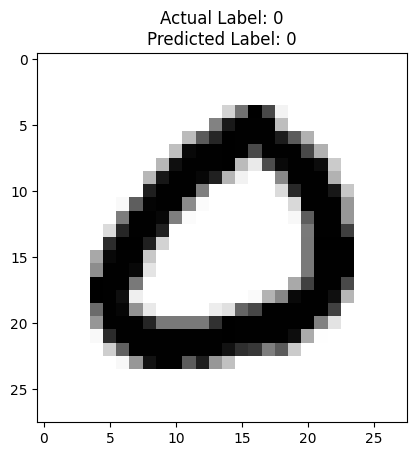

In [5]:
# Import necessary libraries
import tensorflow as tf  # This is the framework that powers our machine learning
from tensorflow import keras  # Keras is a part of TensorFlow that makes it easier to create neural networks
import numpy as np  # We'll use this for math operations
import matplotlib.pyplot as plt  # This helps us show images and plots

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data: We're getting the data ready for our machine learning model
train_images = train_images / 255.0  # We're making sure pixel values are between 0 and 1
test_images = test_images / 255.0

# Build the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(128, activation='relu'),  # A hidden layer with 128 neurons and ReLU activation
    keras.layers.Dropout(0.2),  # Dropout helps prevent overfitting
    keras.layers.Dense(10)  # The output layer with 10 units for digits 0 to 9
])

# Compile the model: This sets up how the model should learn
model.compile(optimizer='adam',  # Adam is a good optimizer for many problems
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # This is how we measure our error
              metrics=['accuracy'])  # This is a helpful metric to see how well our model is doing

# Train the model: We're teaching our model to recognize digits
model.fit(train_images, train_labels, epochs=5)  # We repeat this process 5 times

# Evaluate the model on test data: We're checking how well our model can recognize new, unseen data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Make predictions on test images: Now our model can guess what digits are in new pictures
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Show a random test image and what our model thinks it is
rand_idx = np.random.randint(0, len(test_images))
plt.figure()
plt.imshow(test_images[rand_idx], cmap=plt.cm.binary)
plt.title(f"Actual Label: {test_labels[rand_idx]}\nPredicted Label: {np.argmax(predictions[rand_idx])}")
plt.show()